# The Effect of Air Pollution on Housing Prices in Greater Boston###

## Key Takeaways: ##

**-Our cross-validated CART model underperformed a linear model in out-of-sample testing.**

**-Model performance was evaluated based on the sum of squared errors.**

**-More complex models are not necessarily better.** 

In [208]:
shhh = suppressPackageStartupMessages
install.packages('tidyverse')
shhh(library('tidyverse'))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### **Exploratory Data Analysis**

*Read and examine data set structure*

In [152]:
boston = read.csv("boston.csv")

In [153]:
str(boston)

'data.frame':	506 obs. of  16 variables:
 $ TOWN   : Factor w/ 92 levels "Arlington","Ashland",..: 54 77 77 46 46 46 69 69 69 69 ...
 $ TRACT  : int  2011 2021 2022 2031 2032 2033 2041 2042 2043 2044 ...
 $ LON    : num  -71 -71 -70.9 -70.9 -70.9 ...
 $ LAT    : num  42.3 42.3 42.3 42.3 42.3 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.

In [205]:
summary(boston)

                TOWN         TRACT           LON              LAT       
 Cambridge        : 30   Min.   :   1   Min.   :-71.29   Min.   :42.03  
 Boston Savin Hill: 23   1st Qu.:1303   1st Qu.:-71.09   1st Qu.:42.18  
 Lynn             : 22   Median :3394   Median :-71.05   Median :42.22  
 Boston Roxbury   : 19   Mean   :2700   Mean   :-71.06   Mean   :42.22  
 Newton           : 18   3rd Qu.:3740   3rd Qu.:-71.02   3rd Qu.:42.25  
 Somerville       : 15   Max.   :5082   Max.   :-70.81   Max.   :42.38  
 (Other)          :379                                                  
      MEDV            CRIM                ZN             INDUS      
 Min.   : 5.00   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46  
 1st Qu.:17.02   1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19  
 Median :21.20   Median : 0.25651   Median :  0.00   Median : 9.69  
 Mean   :22.53   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14  
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10  
 M

*Below is a plot of all census tracts in the Boston area.*

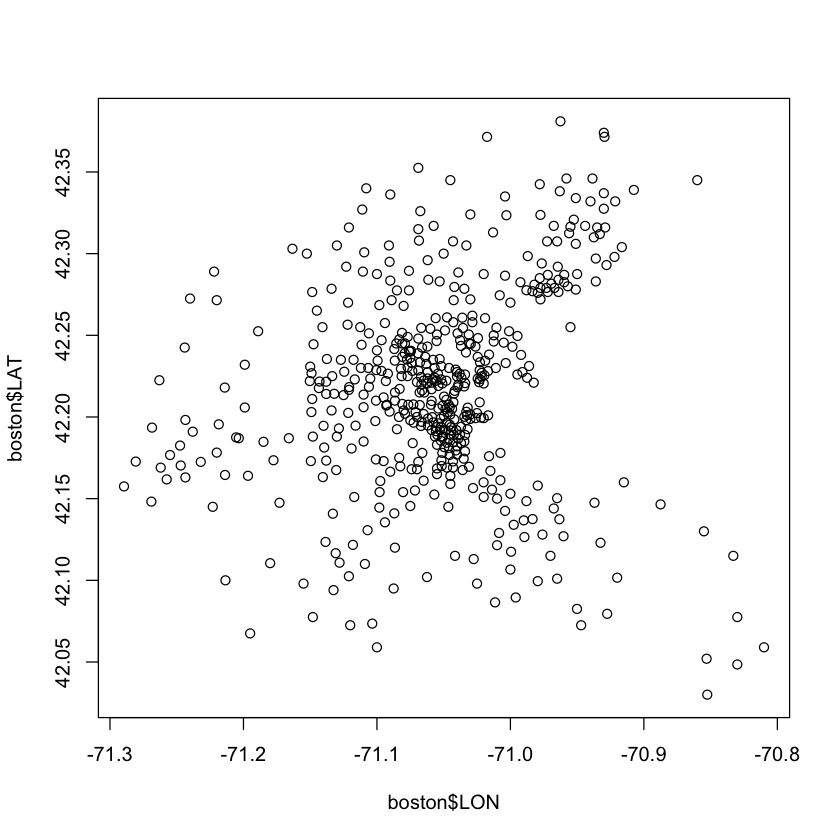

In [154]:
plot(boston$LON, boston$LAT)

*Census tracts in blue lie along the Charles River. MIT's census tract is in red.*

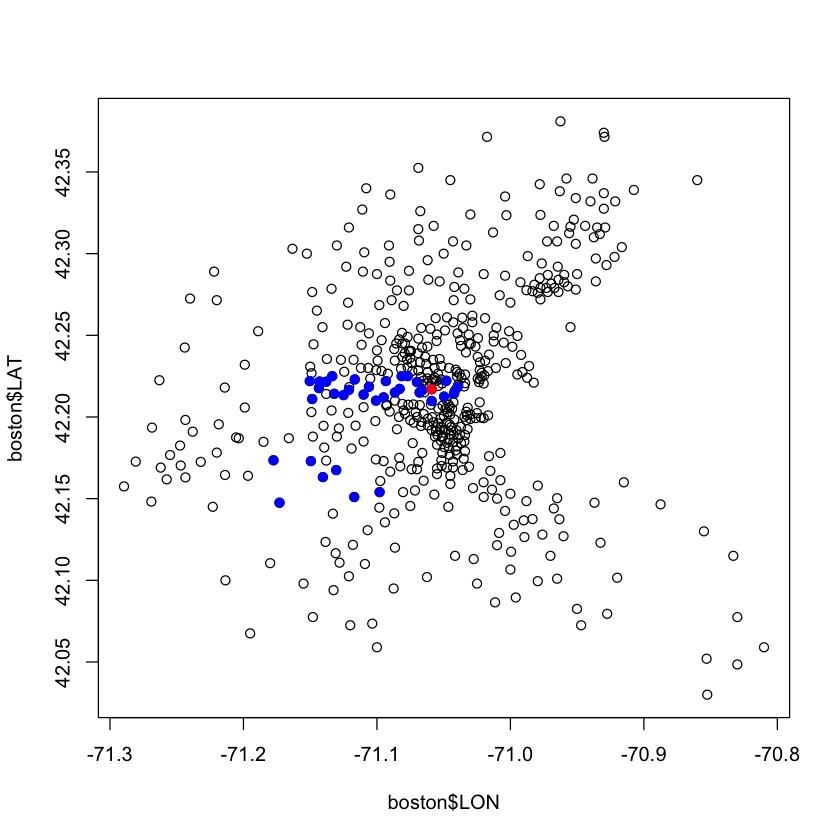

In [155]:
plot(boston$LON, boston$LAT)
points(boston$LON[boston$CHAS==1], boston$LAT[boston$CHAS==1], col="blue", pch=19)
points(boston$LON[boston$TRACT==3531], boston$LAT[boston$TRACT==3531], col="red", pch=19 )

*Summary data for NOX gas and plot of tracts with above-mean concentrations of NOX (in green).*

In [156]:
summary(boston$NOX)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3850  0.4490  0.5380  0.5547  0.6240  0.8710 

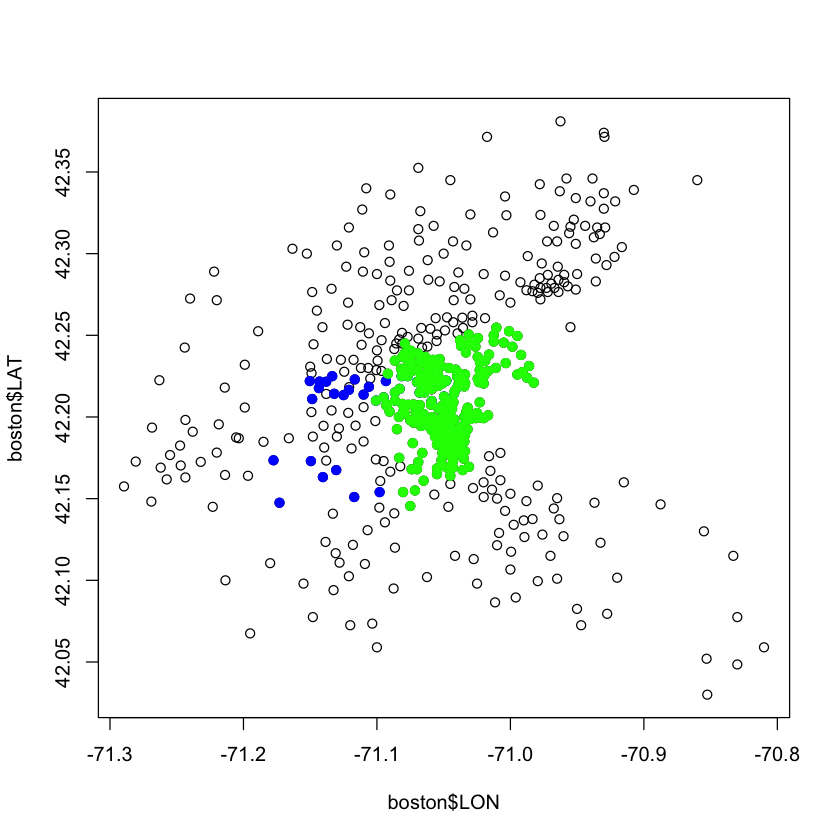

In [157]:
plot(boston$LON, boston$LAT)
points(boston$LON[boston$CHAS==1], boston$LAT[boston$CHAS==1], col="blue", pch=19)
points(boston$LON[boston$TRACT==3531], boston$LAT[boston$TRACT==3531], col="red", pch=19 )
points(boston$LON[boston$NOX>=mean(boston[["NOX"]])], boston$LAT[boston$NOX>=mean(boston[["NOX"]])], col="green", pch=19)

*Distribution and plot of median housing prices in boston census tracts. A simple pattern is not evident.*

In [158]:
summary(boston$MEDV)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

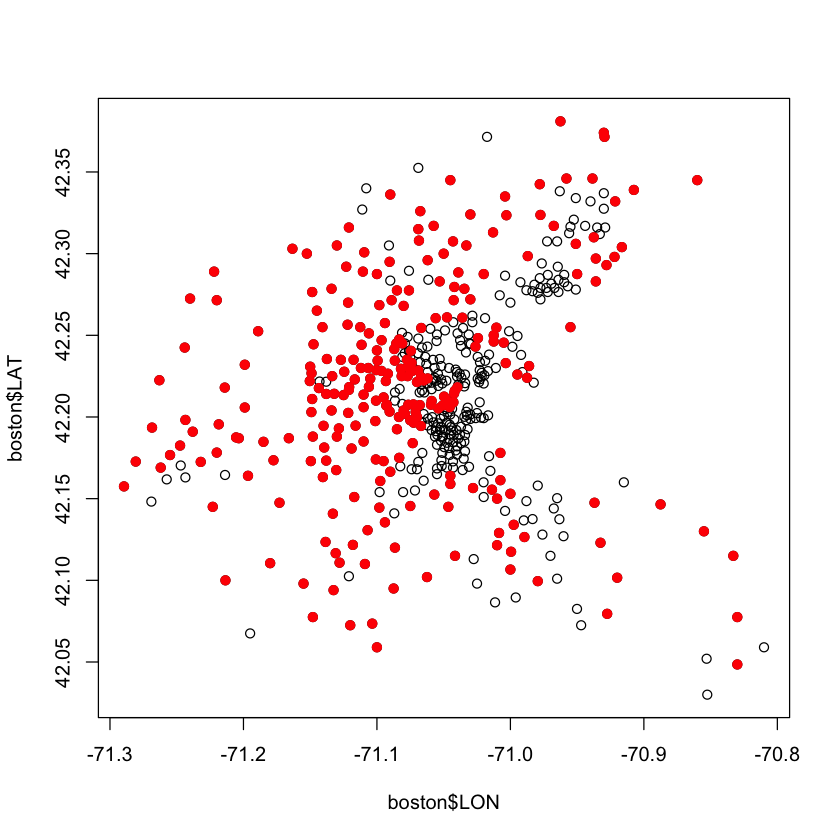

In [159]:
plot(boston$LON, boston$LAT)
points(points(boston$LON[boston$MEDV>=median(boston[["MEDV"]])], boston$LAT[boston$MEDV>=median(boston[["MEDV"]])], col="red", pch=19))

*Is a linear model apropriate along latitude and longitude?*

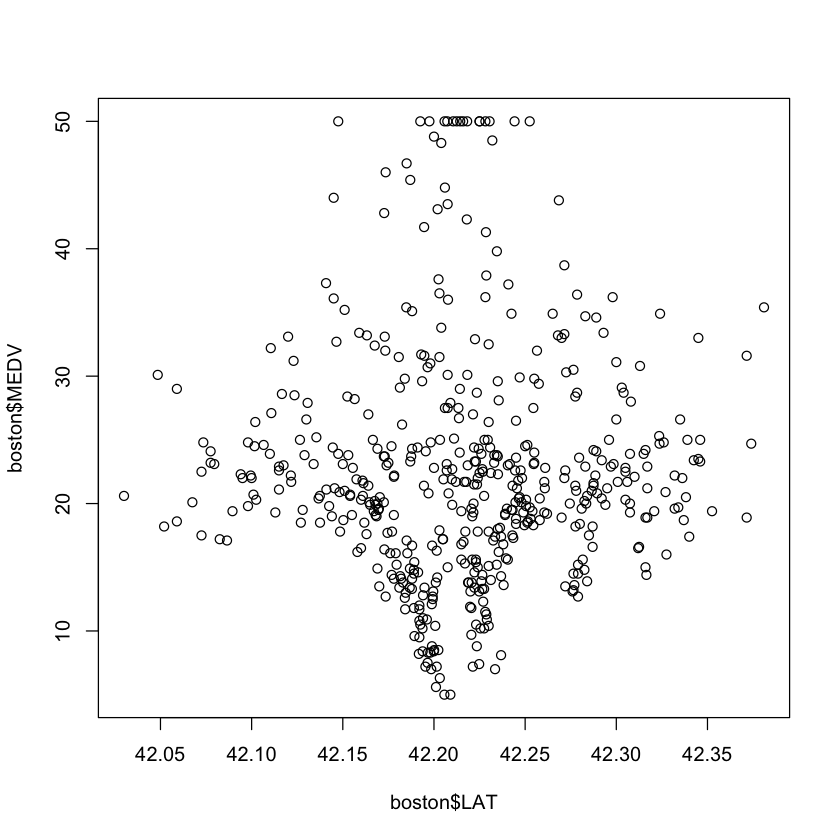

In [160]:
plot(boston$LAT, boston$MEDV)

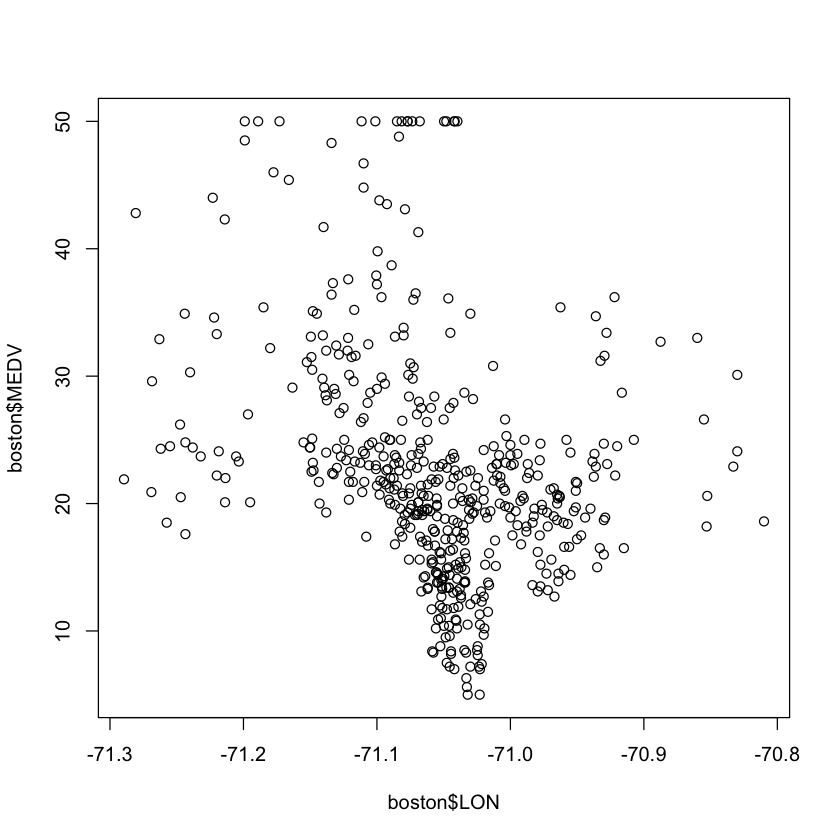

In [161]:
plot(boston$LON, boston$MEDV)

### **Linear Model**

*While the data are not an ideal candidate for a linear model, creating one is a small investment and will give us a basis for comparison relative to more advanced modeling techniques.*

**Linear Model**

*While our eyes tell us that the data are likely ill-suited for a linear model, creating one is a small investment and will give us a second basis for comparison as we move towards more advanced modeling techniques.*

In [162]:
latlonlm = lm(MEDV ~ LAT + LON, data=boston)
summary(latlonlm)


Call:
lm(formula = MEDV ~ LAT + LON, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.460  -5.590  -1.299   3.695  28.129 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3178.472    484.937  -6.554 1.39e-10 ***
LAT             8.046      6.327   1.272    0.204    
LON           -40.268      5.184  -7.768 4.50e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.693 on 503 degrees of freedom
Multiple R-squared:  0.1072,	Adjusted R-squared:  0.1036 
F-statistic: 30.19 on 2 and 503 DF,  p-value: 4.159e-13


*Reults of linear model are puzzling. Adjusted R-Squared is 0.1036, which is uninspiring. Latitude is insignificant, but Longitude is both significant and negative, implying median home prices decrease as one moves toward the ocean. Typically, ocean-front property is **more** expensive than living inland. This does not bode well for our linear model.* 

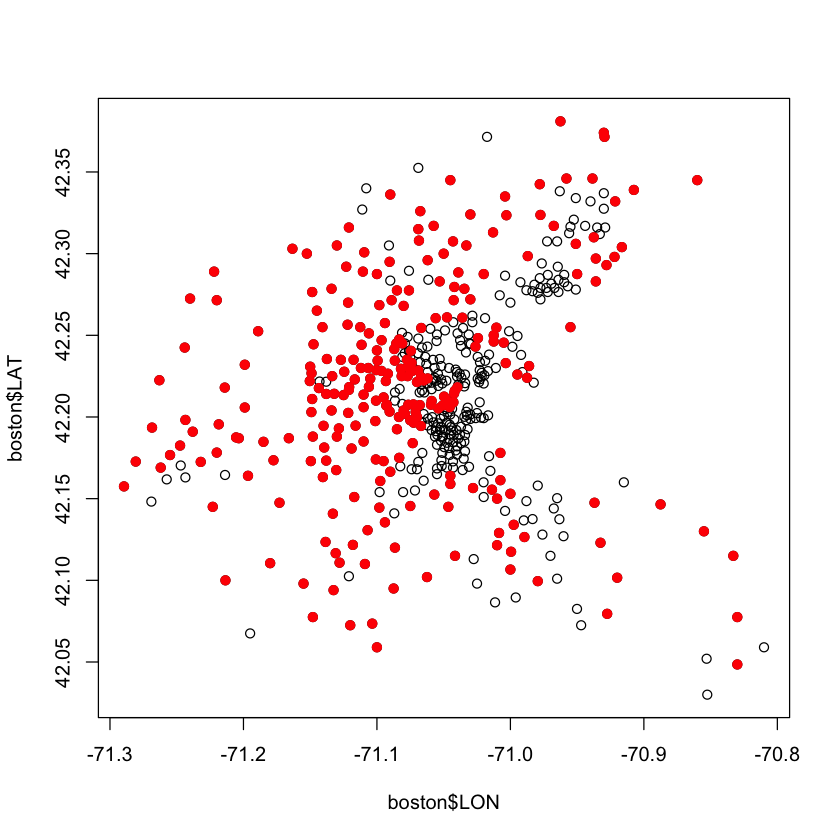

In [163]:
plot(boston$LON, boston$LAT)
points(points(boston$LON[boston$MEDV>=median(boston[["MEDV"]])], boston$LAT[boston$MEDV>=median(boston[["MEDV"]])], col="red", pch=19))

*How do the fitted values from our linear model compare to the above census tracts with home values known to be above the median?*

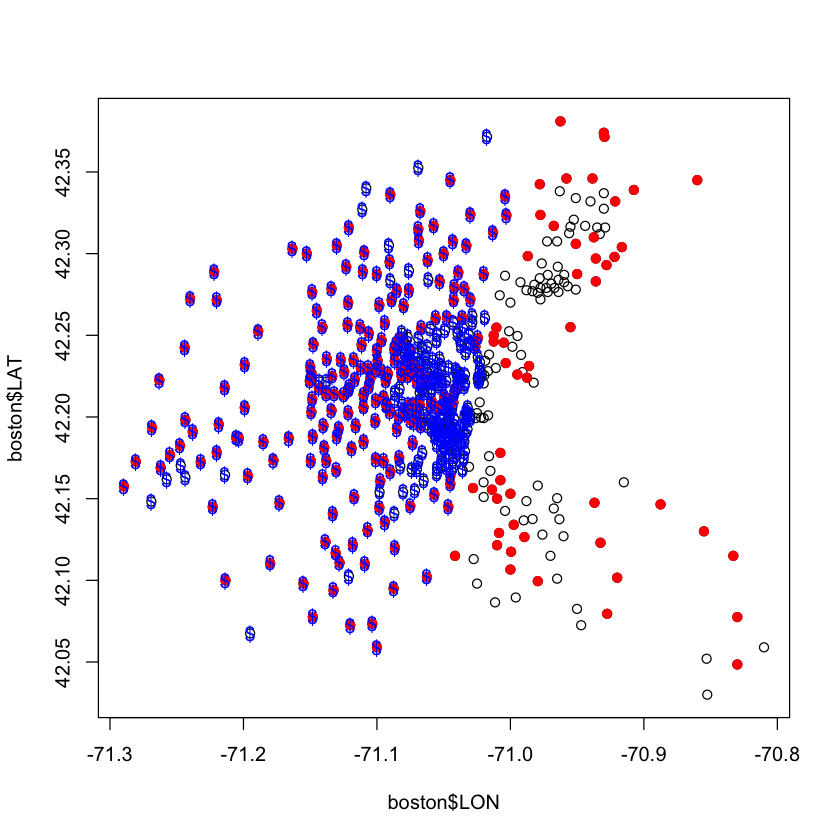

In [164]:
plot(boston$LON, boston$LAT)
points(points(boston$LON[boston$MEDV>=median(boston[["MEDV"]])], boston$LAT[boston$MEDV>=median(boston[["MEDV"]])], col="red", pch=19))
points(boston$LON[latlonlm$fitted.values >= median(boston[['MEDV']])], boston$LAT[latlonlm$fitted.values >= median(boston[['MEDV']])], col="blue", pch="$")

*The graph confirms that our linear model is wrong. The large cluster or blue data points in the lower center of the graph corresponds to South Boston, where there were no red dots indicating above median home prices. Latitude was tagged as an insignificant variable, yet the frequency of above median home prices changes with latitude. The model draws a clear, vertical line of separation near longitude -71.0, however, it ignores everything to the right of this line.*

### **Non-Linear Model: Classification & Regression Tree (CART)**

In [165]:
install.packages('rpart.plot')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [166]:
library(rpart)
library(rpart.plot)

In [167]:
latlontree = rpart(MEDV ~ LAT + LON, data=boston)

*The regression tree below offers a median home price prediction based on latitude and longitude. Think of it as a decision tree. As one answers the yes know questions, one draws closer to landing in a numerical "bucket," which represents the median home value estimate for that group of properties based on the model.*

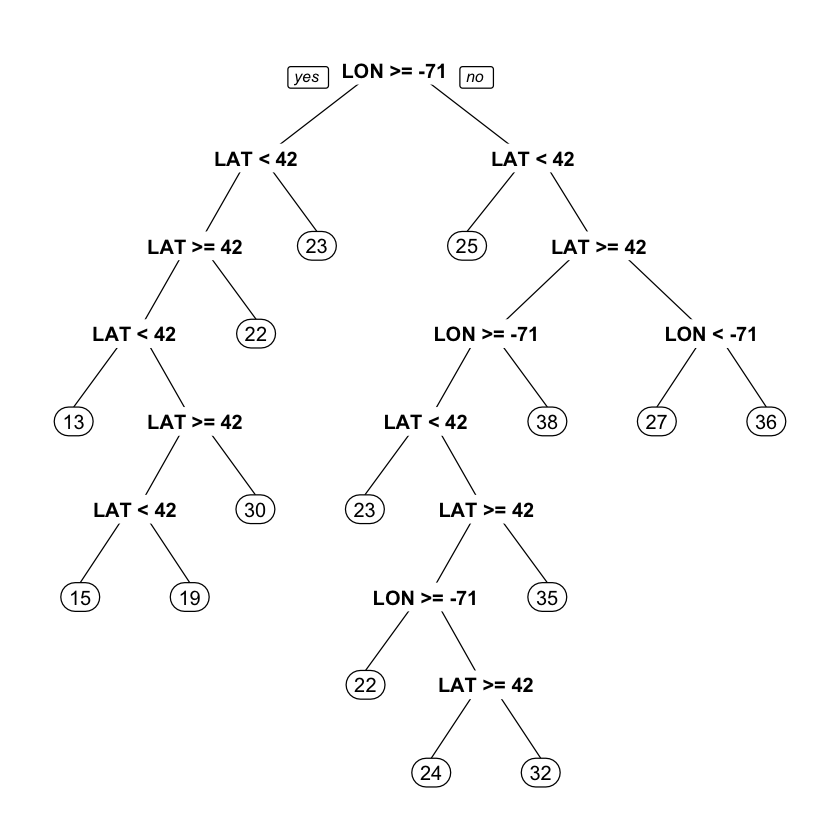

In [168]:
prp(latlontree)

In [169]:
fittedvalues = predict(latlontree)

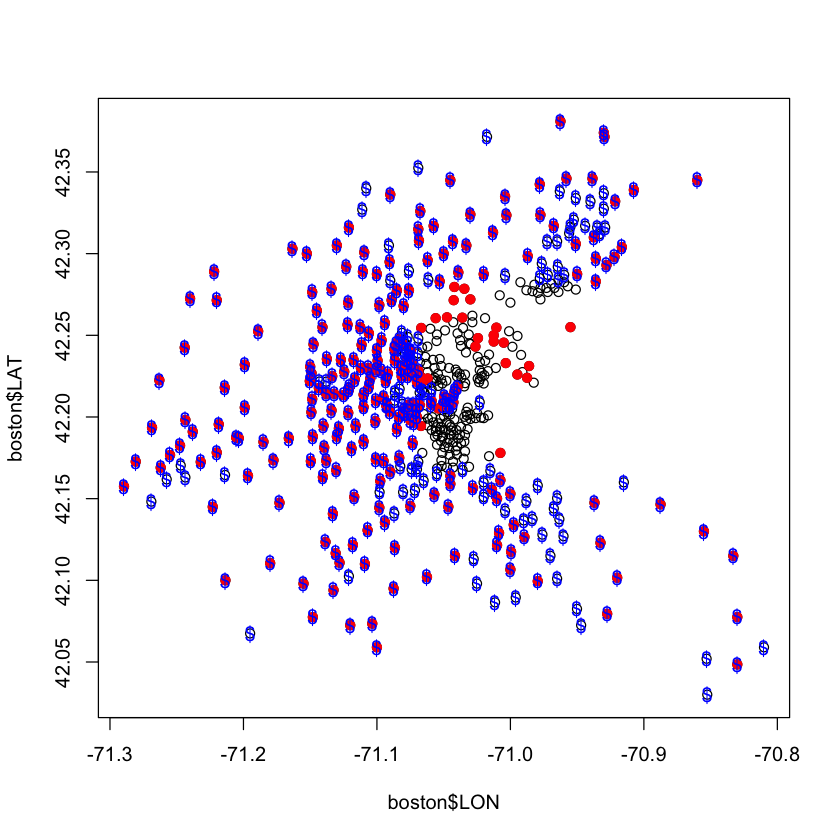

In [170]:
plot(boston$LON, boston$LAT)
points(points(boston$LON[boston$MEDV>=median(boston[["MEDV"]])], boston$LAT[boston$MEDV>=median(boston[["MEDV"]])], col="red", pch=19))
points(boston$LON[fittedvalues >= median(boston[['MEDV']])], boston$LAT[fittedvalues >= median(boston[['MEDV']])], col="blue", pch="$")

*The non-linear tree outperformed the linear method. It made both fewer mistakes and captured data points across the graph, tking into account both latitude and longitude. Overfitting is a distinct possibility with all non-linear models; this may be the case here. We can remedy this by changing the minimum bucket size.*

*Effect of changing minimum bucket size & plot methodology*

In [171]:
latlontree_2 = rpart(MEDV ~ LAT + LON, data=boston, minbucket=50)

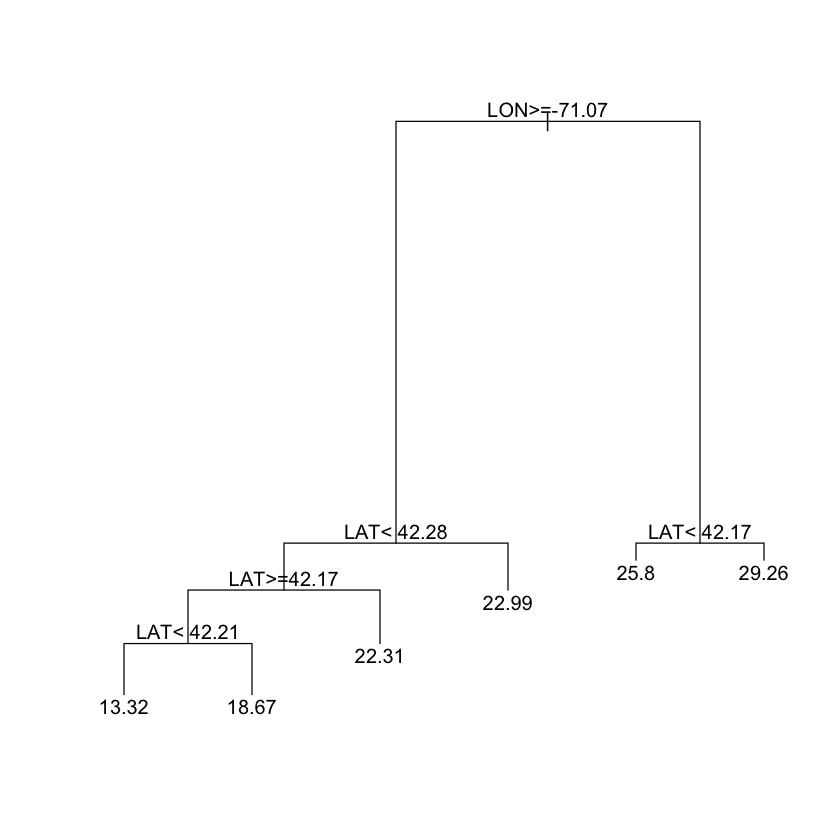

In [172]:
plot(latlontree_2)
text(latlontree_2)

*Our minimum bucket size ensures we have at least 50 observations per bucket, and our new approach to plotting enhances readability. Below, we zero in on that area of Boston where the median home price is 13.32 by following the decision tree.*

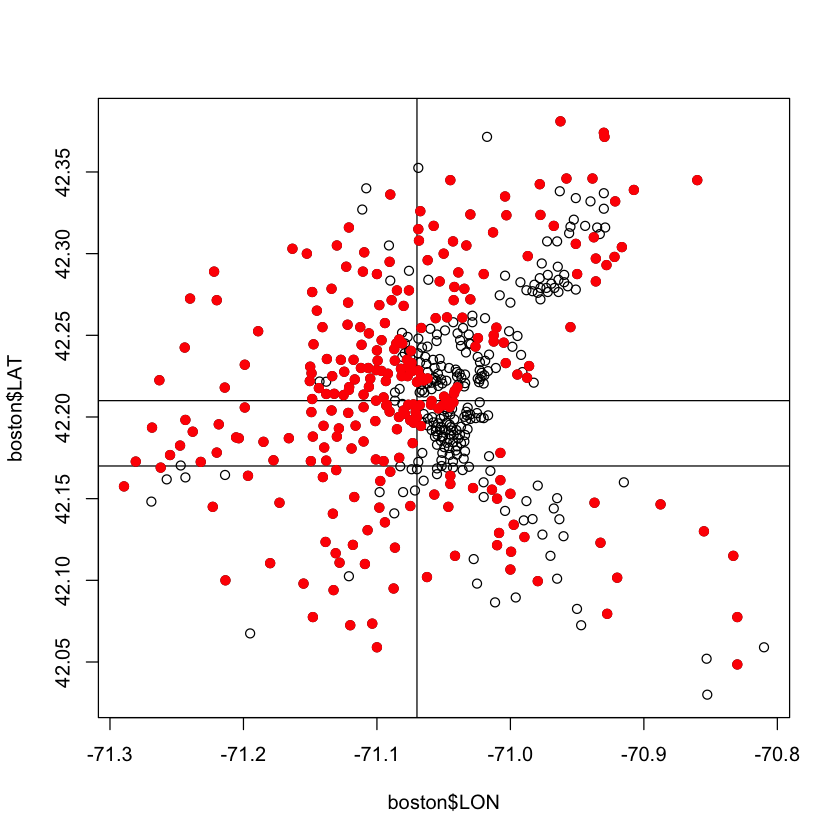

In [173]:
plot(boston$LON, boston$LAT)
abline(v=-71.07)
abline(h=42.17)
abline(h=42.21)
points(boston$LON[boston$MEDV >= median(boston[['MEDV']])], boston$LAT[boston$MEDV >= median(boston[['MEDV']])], col="red", pch=19)

*The low-home-price area (center left box) corresponds to South Boston. It's not entirely surprising that South Boston also has a higher than average concentration of NOX gas. This suggests the concentration of air pollutants may have an impact on housing prices in the greater Boston area.* 

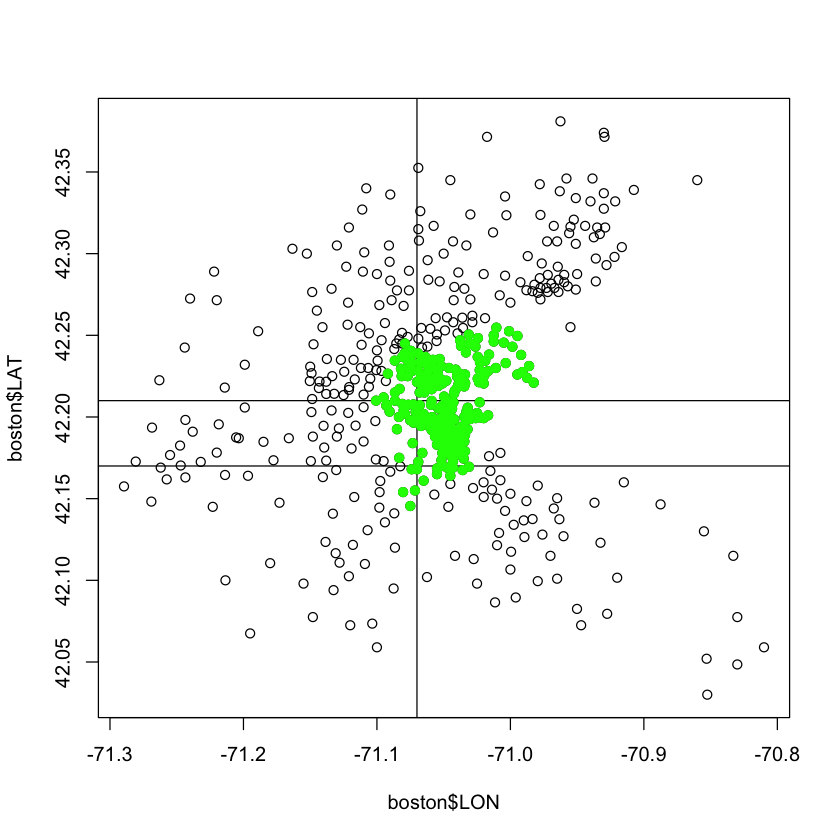

In [174]:
plot(boston$LON, boston$LAT)
abline(v=-71.07)
abline(h=42.17)
abline(h=42.21)
points(boston$LON[boston$NOX >= mean(boston[['NOX']])], boston$LAT[boston$NOX >= mean(boston[['NOX']])], col="green", pch=19)

### **Predictive Modeling**

**Split data into training and test sets.**

In [175]:
install.packages('caTools')
library(caTools)

set.seed(144)

spl = sample.split(boston$MEDV, 0.7)

train = subset(boston, spl == TRUE)
test = subset(boston, spl == FALSE)

Warning message in install.packages("caTools"):
“installation of package ‘caTools’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


**Baseline Model**

In [176]:
baseline = mean(train$MEDV)
baseline

[1] 22.93407

*Our basline model is approximately 22,934. This means that the most simplistic forecast across the data set is one in which all homes, irrespective of census tract, have an average median home value of 22,934.*

In [177]:
baseline_sse = sum((test$MEDV - baseline)^2)

In [178]:
baseline_sse

[1] 9955.585

*Our baseline model has an out-of-sample sum of squared errors (sse) of 9955.58. This is the number our model must beat.*

**Set up 10-Fold Cross Validation Model**

*Recall our earlier statement that overfitting is a distinct possibility with non-linear models. Increasing the number of splits in our decision tree increases the possibility of overfitting, thus decreasing generalizability to the test set. Here, we introduce the complexity parameter (cp) to penalize complexity in our model. The goal of our tree is to minimize the Residual Sum of Squares (RSS) by splitting the tree. If "S" is the number of splits and Lambda is the a penalty parameter, we wish to create a tree that minimizes the sum of the RSS across all leaves first and then adds Lambda x S. Large lambda results in few splits, while small lambda results in many. cp = Lambda/(RSS w/ no splits)*

In [179]:
install.packages('e1071')
install.packages('caret')
library(e1071)
library(caret)

Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [180]:
tr.control = trainControl(method="cv", number=10)

In [181]:
# range of CP values to test (0.00 to 0.01)
cp.grid = expand.grid(.cp = (0:10)*0.001)

In [182]:
tr = train(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO, data=train, method="rpart", trControl=tr.control, tuneGrid=cp.grid )

In [183]:
tr

CART 

364 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 328, 328, 328, 328, 327, 328, ... 
Resampling results across tuning parameters:

  cp     RMSE      Rsquared   MAE     
  0.000  4.219978  0.8060300  2.902254
  0.001  4.228368  0.8049946  2.925562
  0.002  4.227433  0.8058553  2.884118
  0.003  4.287144  0.7991108  2.996080
  0.004  4.420743  0.7852293  3.103240
  0.005  4.359626  0.7905149  3.111085
  0.006  4.362835  0.7887030  3.127559
  0.007  4.393565  0.7862093  3.145140
  0.008  4.419789  0.7843203  3.168064
  0.009  4.441379  0.7828645  3.189122
  0.010  4.432525  0.7835604  3.182523

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.

In [184]:
# model with optimal cp value
best.tree = tr$finalModel

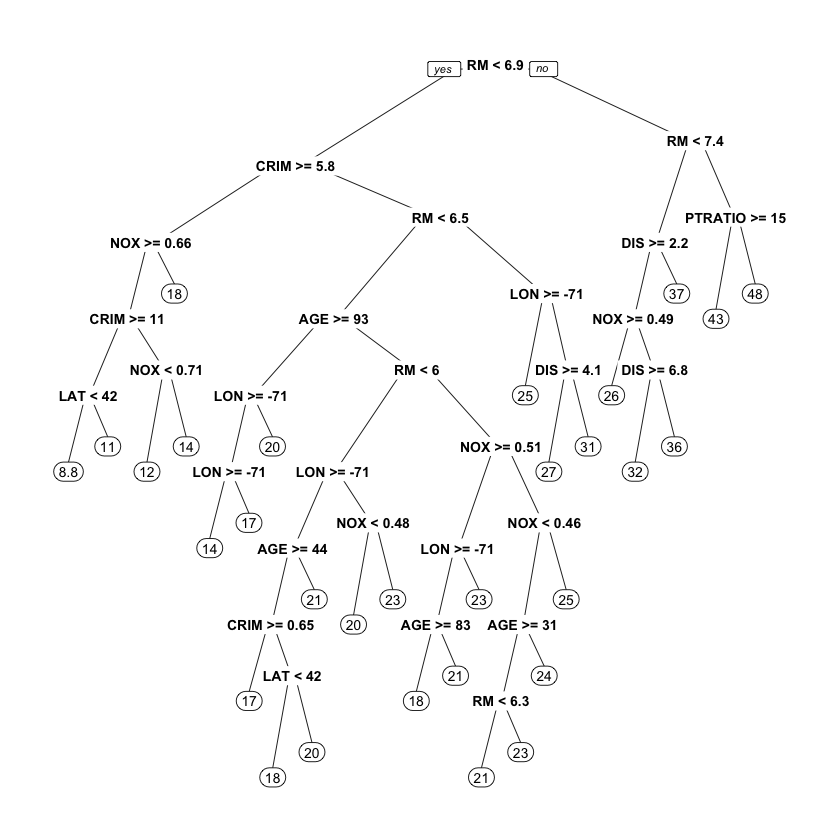

In [185]:
prp(best.tree)

In [186]:
best.tree.pred = predict(best.tree, newdata=test)

In [187]:
best.tree.sse = sum((best.tree.pred - test$MEDV)^2)

In [188]:
best.tree.sse

[1] 6758.513

*Comparison to tree without cross-validation or cp considering only Latitude and Longitude.*

In [189]:
latlontree_2a = rpart(MEDV ~ LAT + LON, data=train, minbucket=50)

In [190]:
latlontree_2a_pred = predict(latlontree_2a, newdata=test)

In [191]:
latlontree_2a_sse = sum((latlontree_2a_pred - test$MEDV)^2)

In [192]:
latlontree_2a_sse

[1] 9237.007

*Comparison to tree without cross-validation or cp contemplating same variables as 'best.tree'.*

In [193]:
latlontree_2b = rpart(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO, data=train, minbucket=50)

In [194]:
latlontree_2b_pred = predict(latlontree_2b, newdata=test)

In [195]:
latlontree_2b_sse = sum((latlontree_2b_pred - test$MEDV)^2)

In [196]:
latlontree_2b_sse

[1] 8425.583

**Our cross-validated tree with control parameter has a lower sum of squared errors (sse) than either of our previous trees in out-of-sample testing.**

*Comparison to linear model*

In [197]:
latlonlm_2 = lm(MEDV ~ LAT + LON, data=train)

In [198]:
latlonlm_2_pred = predict(latlonlm_2, newdata=test)

In [199]:
linear_sse = sum((test$MEDV - latlonlm_2_pred)^2)

In [200]:
linear_sse

[1] 9745.783

*Comparison to revised linear model*

In [201]:
lm_3 = lm(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO, data=train)

In [202]:
lm_3_pred = predict(lm_3, newdata=test)

In [203]:
lm_3_sse = sum((test$MEDV - lm_3_pred)^2)

In [204]:
lm_3_sse

[1] 5178.836

## Conclusion ##

**Our cross-validated tree with control parameter has a HIGHER sum of squared errors (sse) in out-of-sample testing than a linear model contemplating the same variables.**

**Key Takeaway: Just because you can do something complex, doesn't mean you should.** 